# Task I - Data Exploration

The objective of this task is to familiarize you with Python-based data exploration tools. We use the above mentioned trace with 3600 observations as the data set for the following computations.

### 1. Compute the following statistics for each component of X and Y: mean, maximum, minimum, 25th percentile, 90th percentile, and standard deviation.

In [2]:
import pandas
import numpy
import matplotlib
import pylab
import IPython.display

In [3]:
# import dataset_x and dataset_y
data_set_x = pandas.read_csv('X.csv')
data_set_y = pandas.read_csv('Y.csv')

# join operations similar to relational databases on field 'TimeStamp'
data_set = pandas.merge(data_set_x, data_set_y, on='TimeStamp')

In [24]:
data_frame = data_set.describe(percentiles=[0.25, 0.90])
data_frame = data_frame.loc[['mean', 'max', 'min', '25%', '90%', 'std']]
del(data_frame['TimeStamp'])
IPython.display.display(IPython.display.HTML(data_frame.to_html()))

,all_..idle,X..memused,proc.s,cswch.s,file.nr,sum_intr.s,ldavg.1,tcpsck,pgfree.s,DispFrames
mean,9.064981,89.137517,7.683303,54045.874022,2656.333333,19978.040747,75.875772,48.997500,72872.154569,18.818394
max,69.540000,97.840000,48.000000,83880.000000,2976.000000,35536.000000,147.470000,87.000000,145874.000000,30.390000
min,0.000000,73.030000,0.000000,11398.000000,2304.000000,10393.000000,11.130000,21.000000,15928.000000,0.000000
25%,0.000000,82.965000,0.000000,31302.000000,2496.000000,16678.000000,28.200000,34.000000,61601.750000,13.390000
90%,38.621000,96.770000,20.000000,72135.100000,2880.000000,28228.400000,127.993000,71.000000,97532.500000,24.610000
std,16.122822,8.183662,8.532606,19497.811540,196.110748,4797.271325,43.862445,15.871155,19504.321175,5.219756


### 2. Compute the following quantities:


#### (a) the number of observations with memory usage larger than 80%;

In [74]:
data_frame = data_set[ data_set['X..memused'] > 80.00 ]
number_observations = data_frame.shape[0]
print('Number of observations with memory usage larger than 80%:', number_observations)

Number of observations with memory usage larger than 80%: 2875


#### (b) the average number of used TCP sockets for observations with more than 18000 interrupts/sec; 

In [91]:
data_frame = data_set[ data_set['sum_intr.s'] > 18000 ]
data_frame = data_frame.mean(axis=0)
mean_tcp_sockets = data_frame['tcpsck']
print('The average number of used TCP sockets for observations with more than 18000 interrupts/sec is', mean_tcp_sockets)

The average number of used TCP sockets for observations with more than 18000 interrupts/sec is 46.34730538922156


####  (c) The minimum memory utilization for observations with CPU idle time lower than 20%.

In [8]:
data_frame = data_set[ data_set['all_..idle'] < 20.0 ]
data_frame = data_set.min(axis=0)
minimum_memory_utilization = data_frame['X..memused']
print('The minimum memory utilization for observations with CPU idle time lower than 20% is', minimum_memory_utilization)

The minimum memory utilization for observations with CPU idle time lower than 20% is 73.03


### 3. Produce the following plots:

#### (a) Time series of percentage of idle CPU and of used memory (both in a single plot)

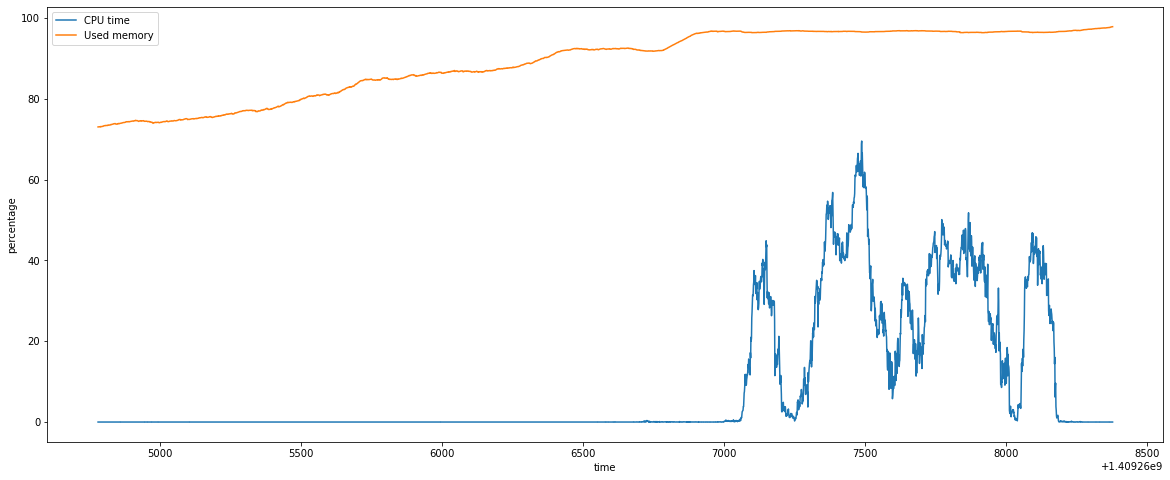

In [120]:
data_frame = pandas.DataFrame(dataset, columns = ['TimeStamp', 'all_..idle', 'X..memused'])
data_frame = data_frame.rename(columns = { 'TimeStamp': 'time', 'all_..idle' : 'CPU time', 'X..memused': 'Used memory'})
data_frame.index = data_frame['time'] # set time_stamp as a axis
del(data_frame['time']) # not show time_stamp as a function
plot = data_frame.plot(figsize=(20, 8))
plot.set_xlabel('time')
plot.set_ylabel('percentage')
matplotlib.pyplot.show()

#### (b) Density plots, histograms, and box plots of idle CPU and of used memory.

In [149]:
data_frame = pandas.DataFrame(dataset, columns = ['TimeStamp', 'all_..idle', 'X..memused'])
data_frame = data_frame.rename(columns = { 'TimeStamp': 'time', 'all_..idle' : 'CPU time', 'X..memused': 'Used memory'})
data_frame.index = data_frame['time'] # set time_stamp as a axis
del(data_frame['time']) # not show time_stamp as a function

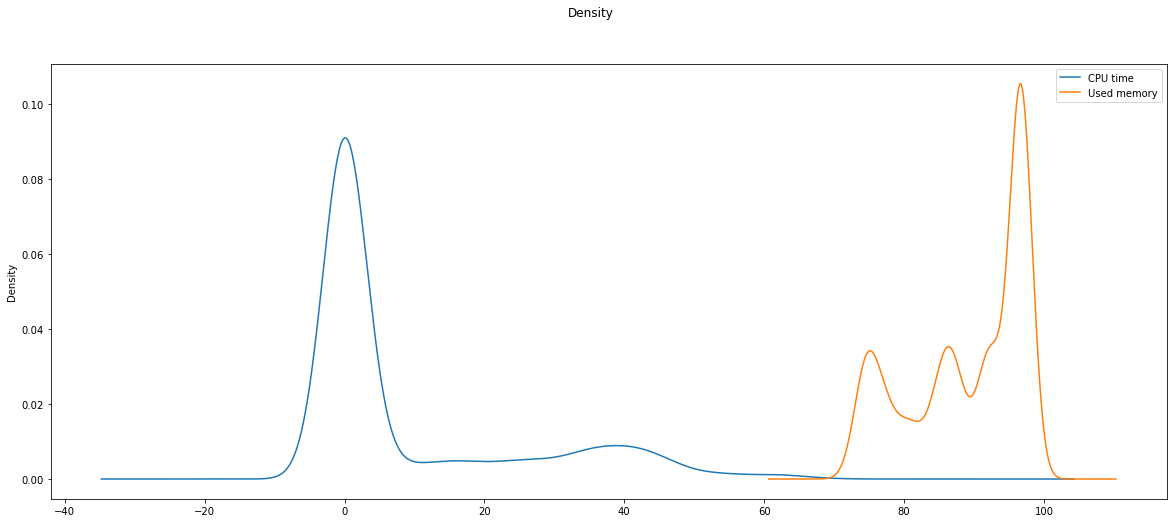

In [150]:
data_frame.plot.density(figsize=(20, 8))
pylab.suptitle('Density')
matplotlib.pyplot.show()

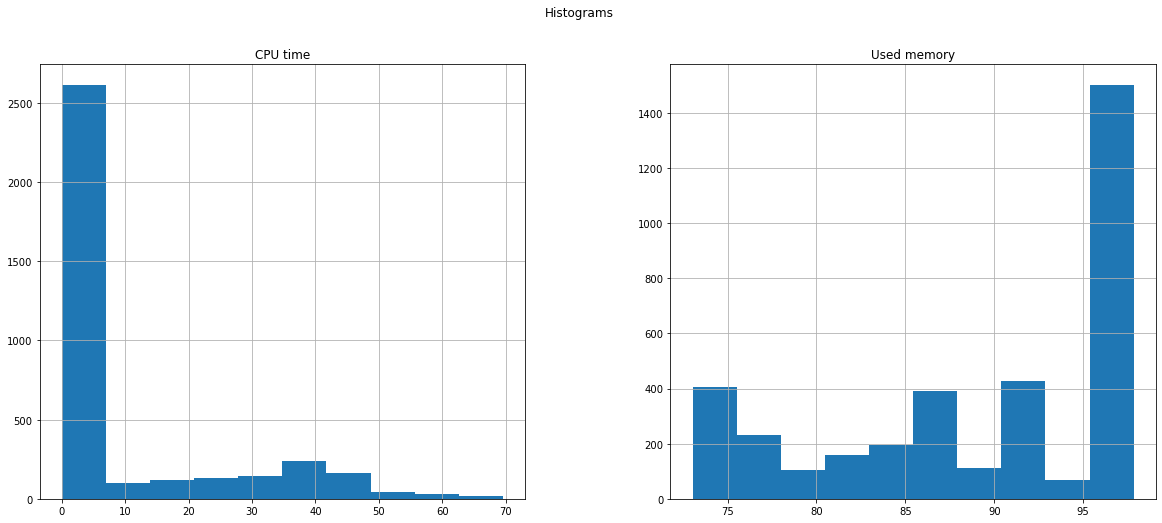

In [151]:
data_frame.hist(figsize=(20, 8))
pylab.suptitle('Histograms')
matplotlib.pyplot.show()

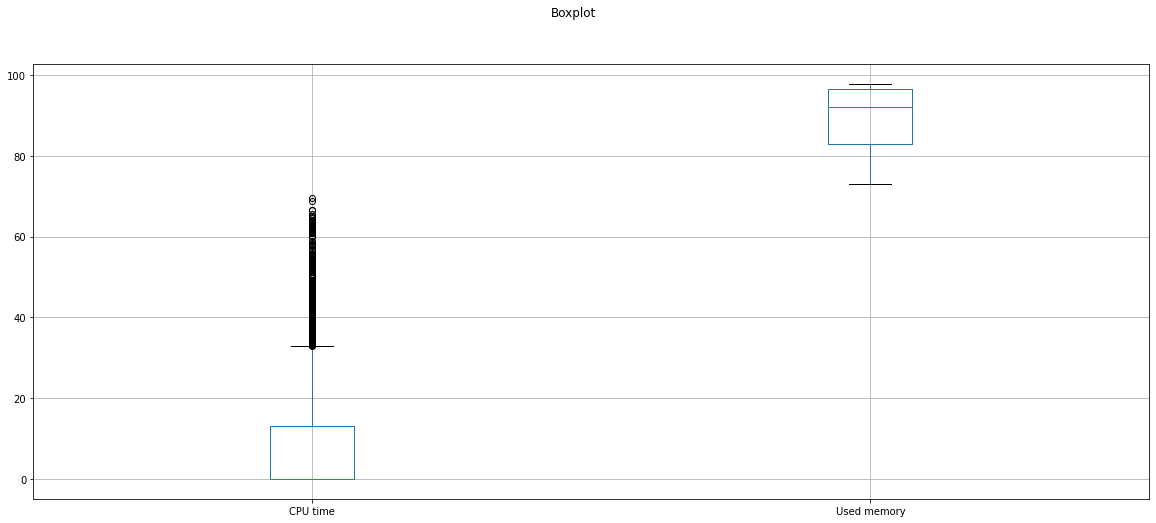

In [147]:
data_frame.boxplot(figsize=(20, 8))
pylab.suptitle('Boxplot')
matplotlib.pyplot.show()